# Lab 2: Data Preprocessing

In this assignment, we will learn how to explore the raw data and preprocess it. 

The dataset we are going to exlore is an insurance data. It provides different features of each user as follows:
* age: age of the user
* sex: gender of the user
* bmi: body mass index, providing an understanding of body
* children: number of children covered by health insurance / number of dependents
* smoker: smoker or not
* region: the user's residential area in the US, northeast, southeast, southwest, northwest.

Additionally, the medical cost of each user is also provided: 
* charges: the medical cost 

Please follow Lecture 5_data_understanding and Lecture 6_data_preprocessing to complete following questions. 

### Q1. Load data with Pandas and output the basic information of this dataset, such as the features and their data types.  Which features are numerical features and which users are categorical features?


In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# your code
df = pd.read_csv('insurance.csv')
df

#sex, smoker, and region are categorical features
#age, bmi, children, and charges are numerical features

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Q2. Check whether there are missing values in this dataset.

In [35]:
# your code
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Q3. Visualize all numerical features with histogram plot to see the distribution of each numerical feature. 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002257BC9D208>,
      dtype=object)

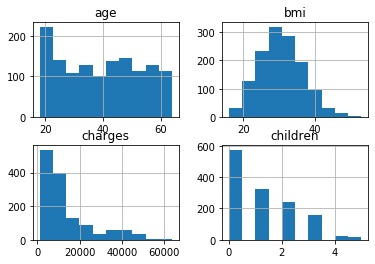

In [36]:
# your code
df.hist()

### Q4. Use corr() function of Pandas to show the correlation between different numerical features

In [37]:
# your code
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


### Q5. For all categorical features, use bar plot to visualize the number of users within each category.

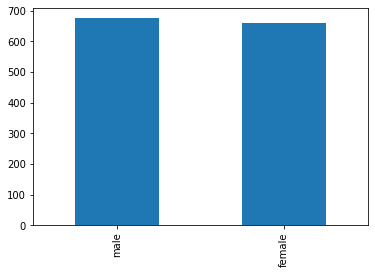

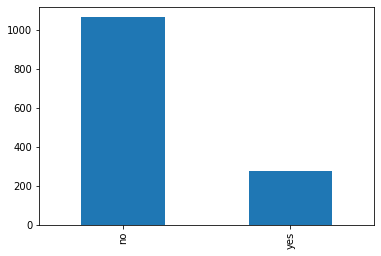

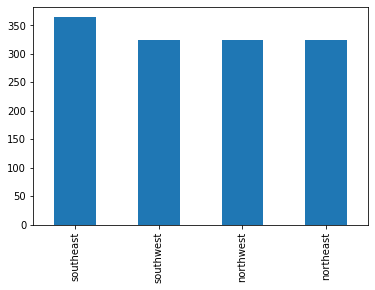

In [38]:
# your code
df['sex'].value_counts().plot(kind='bar')
plt.show()
df['smoker'].value_counts().plot(kind='bar')
plt.show()
df['region'].value_counts().plot(kind='bar')
plt.show()

### Q6. Convert all categorical features into numerical features with Label Encoding or One-Hot Encoding

In [46]:
# your code
#male = 0, female = 1
sex = []
for i in df['sex']:
    if (i == 'male'):
        sex.append(0)
    if (i == 'female'):
        sex.append(1)
df['sex'] = sex

#no = 0, yes = 1
smoker = []
for i in df['smoker']:
    if (i == 'no'):
        smoker.append(0)
    if (i == 'yes'):
        smoker.append(1)
df['smoker'] = smoker

#northwest = 0, northeast = 1, southwest = 2, southeast = 3
region = []
for i in df['region']:
    if (i == 'northwest'):
        region.append(0)
    if (i == 'northeast'):
        region.append(1)
    if (i == 'southwest'):
        region.append(2)
    if (i == 'southeast'):
        region.append(3)
df['region'] = region
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,2,16884.92400
1,18,0,33.770,1,0,3,1725.55230
2,28,0,33.000,3,0,3,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,10600.54830
1334,18,1,31.920,0,0,1,2205.98080
1335,18,1,36.850,0,0,3,1629.83350
1336,21,1,25.800,0,0,2,2007.94500


### Q7. Normalize all numerical features

In [48]:
# your code

#min-max normalization
minimum = df.min(axis=0)
maximum = df.max(axis=0)

df = (df - minimum) / (maximum - minimum)
df

,age,sex,bmi,children,smoker,region,charges
0,0.021739,1.0,0.321227,0.0,1.0,0.666667,0.251611
1,0.000000,0.0,0.479150,0.2,0.0,1.000000,0.009636
2,0.217391,0.0,0.458434,0.6,0.0,1.000000,0.053115
3,0.326087,0.0,0.181464,0.0,0.0,0.000000,0.333010
4,0.304348,0.0,0.347592,0.0,0.0,0.000000,0.043816
...,...,...,...,...,...,...,...
1333,0.695652,0.0,0.403820,0.6,0.0,0.000000,0.151299
1334,0.000000,1.0,0.429379,0.0,0.0,0.333333,0.017305
1335,0.000000,1.0,0.562012,0.0,0.0,1.000000,0.008108
1336,0.065217,1.0,0.264730,0.0,0.0,0.666667,0.014144


### Q8. Save your preprocessed data into a csv file. Submit your code and the preprocessed data.

In [49]:
df.to_csv('preprocessed_data.csv')